<a href="https://colab.research.google.com/github/Maradonas/FIAP-TECH-CHALLENGER-1/blob/diego-analises/Comercializacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Maradonas/FIAP-TECH-CHALLENGER-1/refs/heads/diego-analises/Dados/Ddo_Comercio.csv',sep=';')


In [ ]:
df = df.rename(columns={'Produto': 'produto'})

In [ ]:
df_melt = pd.melt(
    df
    ,id_vars=(['id','control','produto'])
    ,value_vars=df.iloc[:,3:].columns
    ,var_name = 'data'
)

In [ ]:
df_melt['data'] = pd.to_datetime(df_melt['data'],format='%Y')

In [ ]:
df_melt_group = df_melt.loc[df_melt['control'].isin(['DERIVADOS','SUCO','VINHO DE MESA','VINHO FINO DE MESA'
                                                      ,'VINHO FRIZANTE','VINHO ORGÂNICO','VINHO ESPECIAL'
                                                      ,'ESPUMANTES','SUCO DE UVAS','SUCO DE UVAS CONCENTRADO','OUTROS PRODUTOS COMERCIALIZADOS'])]

df_melt_group = df_melt_group.loc[df_melt_group['data']>='2009']
#df_melt_group = df_melt_group.groupby(['produto','data'])

In [ ]:
df_soma_litros_historico = df_melt_group.groupby(['data'])['value'].sum()

In [ ]:
df_soma_litros = df_melt_group.groupby(['produto'])['value'].sum().sort_values(ascending=False)

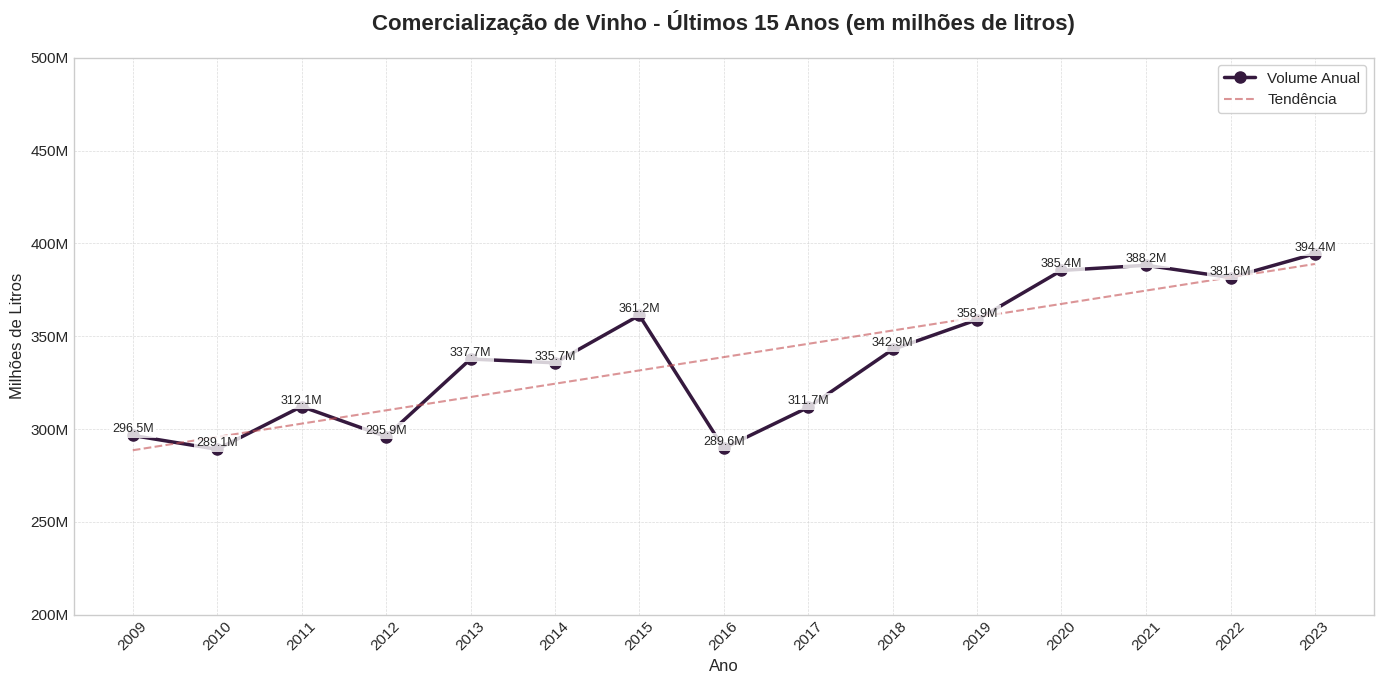

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np

# Configurações de estilo
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("rocket")

# Criando a figura
fig, ax = plt.subplots(figsize=(14, 7))

# Convertendo valores para milhões
valores_em_milhoes = df_soma_litros_historico.values / 1_000_000

# --- PLOT PRINCIPAL ---
ax.plot(df_soma_litros_historico.index,
        valores_em_milhoes,
        linewidth=2.5,
        marker='o',
        markersize=8,
        label='Volume Anual')

# --- CONFIGURAÇÕES DO GRID ---
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
ax.grid(True, which='minor', linestyle=':', linewidth=0.5, alpha=0.3)

# --- MELHORIAS VISUAIS ---
plt.title('Comercialização de Vinho - Últimos 15 Anos (em milhões de litros)',
          fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Milhões de Litros', fontsize=12)

# Eixo X (datas)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45)

# Eixo Y (em milhões) - LIMITE AJUSTADO PARA 600
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}M"))
ax.set_ylim(bottom=200, top=500)  # Corrigido: de 0 a 600 milhões

# Valores nos pontos
for x, y in zip(df_soma_litros_historico.index, valores_em_milhoes):
    ax.text(x, y, f'{y:,.1f}M',
            ha='center',
            va='bottom',
            fontsize=9,
            bbox=dict(facecolor='white', edgecolor='none', alpha=0.8, pad=2))

# Linha de tendência (adicionada novamente)
x_num = mdates.date2num(df_soma_litros_historico.index)
coef = np.polyfit(x_num, valores_em_milhoes, 1)
ax.plot(df_soma_litros_historico.index, np.polyval(coef, x_num),
        'r--',
        alpha=0.6,
        label='Tendência')

ax.legend(frameon=True, framealpha=0.9)
plt.tight_layout()
plt.show()

<ipython-input-119-1ef59874c9d8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=valores_em_milhoes,


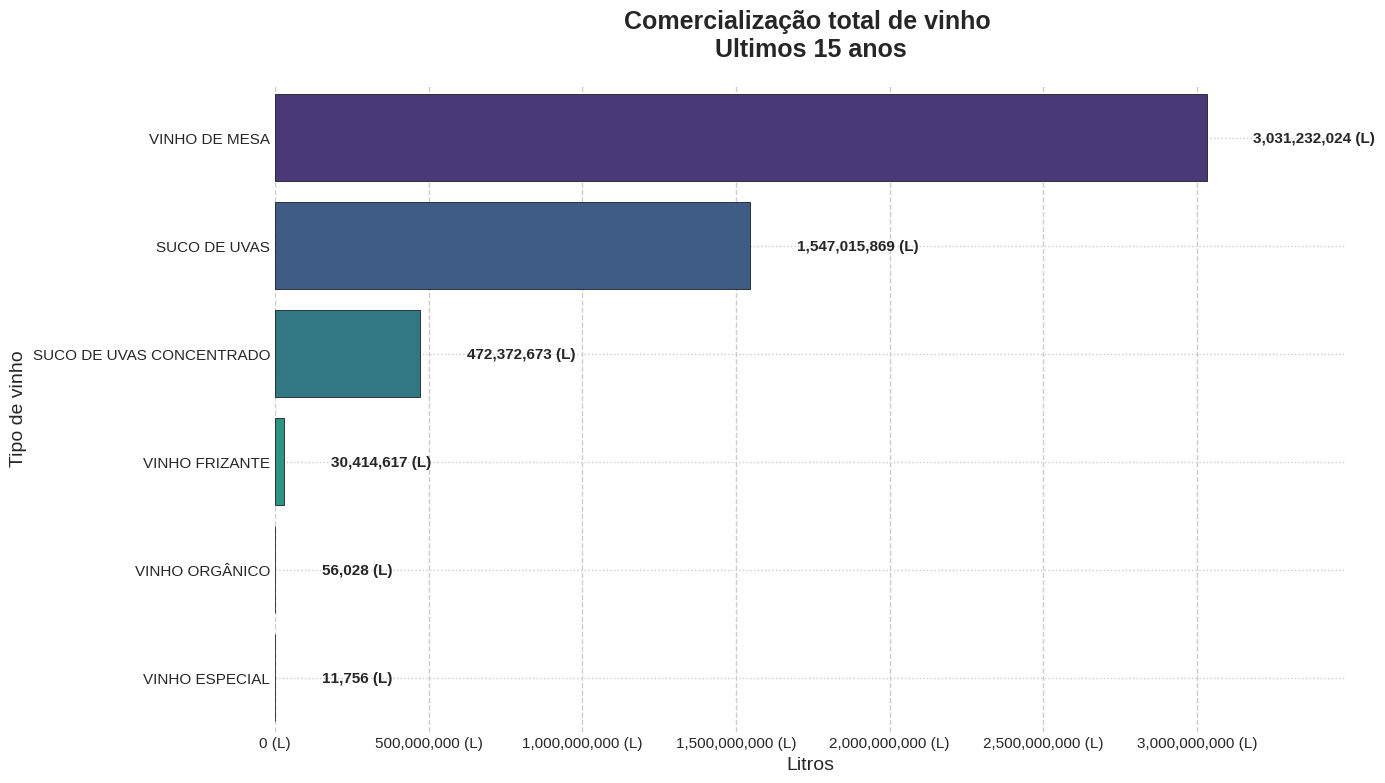

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuração de estilo profissional
plt.style.use('seaborn-v0_8-whitegrid')
#sns.set_palette("rocket")  # Paleta invertida para melhor contraste

# Criando figura com proporção ideal para barras horizontais
fig, ax = plt.subplots(figsize=(14, 8))

# Convertendo para milhões
valores_em_milhoes = df_soma_litros.values #/ 1_000_000

# Gráfico de barras horizontal
barplot = sns.barplot(x=valores_em_milhoes,
                     y=df_soma_litros.index,
                     orient='h',
                     saturation=0.8,
                     edgecolor='black',
                     linewidth=0.5,
                     palette = 'viridis')

# Título e labels
plt.title('Comercialização total de vinho \n Ultimos 15 anos ',
          fontsize=18, pad=20, fontweight='bold')
plt.xlabel('Litros', fontsize=14)
plt.ylabel('Tipo de vinho', fontsize=14)

# Melhorias no eixo X
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f} (L)"))
ax.set_xlim(0, np.max(valores_em_milhoes) * 1.15)  # Espaço extra para rótulos

# Adicionando valores nas barras
for i, valor in enumerate(valores_em_milhoes):
    ax.text(valor + 0.05 * np.max(valores_em_milhoes),  # Posição X
           i,                                           # Posição Y
           f'{valor:,.0f} (L)',                            # Texto formatado
           va='center',                                 # Alinhamento vertical
           fontsize=11,
           fontweight='bold')

# Grade personalizada
ax.grid(True, axis='x', linestyle='--', alpha=1)
ax.grid(True, axis='y', linestyle=':', alpha=1)

# Removendo bordas desnecessárias
sns.despine(left=True, bottom=True)

# Ajuste final
plt.tight_layout()
plt.show()
